### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course Docker environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "HA3.ipynb"

### Fill in group number and member names:

In [2]:
GROUP = "2"
NAME1 = "Anton Öhammar"
NAME2 = "Sanjiv Thottathodhi"

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Docker environment, or alternatively in the provided Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assert nb_dirname != '/workspace', \
    '[ERROR] The notebook server appears to have been started via Docker, at the same directory as the assignment. Make sure to start it at least one level above the assignment.'
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/HA3/HA3.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# Home Assignment 3
This home assignment will focus on reinforcement learning and deep reinforcement learning. The first part will cover value-table reinforcement learning techniques, and the second part will include neural networks as function approximators, i.e. deep reinforcement learning. 

When handing in this assignment, make sure that you're handing in the correct version, and more importantly, *that you do no clear any output from your cells*. We'll use these outputs to aid us when grading your assignment.

## Task 1: Gridworld

In this task, you will implement Value Iteration to solve for the optimal policy, $\pi^*$, and the corresponding state value function, $V^*$.

The MDP you will work with in this assignment is illustrated in the figure below

![title](./grid_world.png) 

The agent starts in one of the non-black squares shown in the above figure, and then proceeds to take actions. The available actions at any time step are: **North, West, South,** and **East**. If an action would make the agent bump into a wall, or one of the black (unreachable) states, it instead does nothing, leaving the agent at the same place it was before.

The reward $\mathcal{R}_s^a$ of being in state $s$ and performing actions $a$ is zero for all states, regardless of the action taken, with the exception of the green and the red squares. For the green square, the reward is always 1, and for the red square, always -1, regardless of the action.

When the agent is either in the green or the red square, it will be transported to the terminal state in the next time step, regardless of the action taken. The terminal state is shown as the white square with the "T" inside.

#### State representation
The notations used to define the states are illustrated in the table below

| $S_0$ | $S_1$ | $S_2$ | $S_3$ | $S_4$ |    |
|-------|-------|-------|-------|-------|----|
| $S_5$ | $S_6$ | $S_7$ | $S_8$ | $S_9$ |    |
| $S_{10}$ | $S_{11}$ | $S_{12}$ | $S_{13}$ | $S_{14}$ | $S_{15}$|

where $S_{10}$ corresponds to the initial state of the environment, $S_4$ and $S_9$ to the green and red states of the environment, and $S_{15}$ to the terminal state.


### Task 1.a: Solve for $V^*(s)$ and $Q^*(s,a)$
For this task all transition probabilities are assumed to be 1 (that is, trying to move in a certain direction will definitely move the agent in the chosen direction), and a discount factor of .9, i.e. $\gamma=.9$.

* Solve for $V^*(S_{10})$ 

**Your answer:** (0.9)^5

* Solve $Q^*(S_{10},a)$ for all actions

**Your answer:** Q(left) = Q(down) = (0.9)^6,  Q(right) = Q(up) = (0.9)^5



### Task 1.b Write a mathematical expression relating $V^\pi(s)$ to $Q^\pi(s,a)$ and $\pi(a|s)$


**Your answer:** $V^\pi(s) = \underset{a \in {\cal A}}{\sum} \pi(a|s) Q^\pi(s,a)$


###  Task 1.c: Value Iteration
For this task, the transitions are no longer deterministic. Instead, there is a 0.2 probability that the agent will try to travel in an orthogonal direction of the chosen action (0.1 probability for each of the two orthogonal directions). Note that the Markov decision process is still known and does not have to be learned from experience.

Your task is to implement value iteration and solve for the
* optimal greedy policy $\pi^*(s)$ 
* $V^*(s)$

#### The value iteration algorithm
Value iteration is an iterative algorithm used to compute the optimal value function $V^*(s)$. Each iteration starts with a guess of what the value function is and then uses the Bellman equations to improve this guess iteratively. We can describe one iteration of the algorithm as

$
\textbf{For} ~ s \in {\cal S}:\qquad  \\
\quad V_{k+1}(s) = \underset{a \in {\cal A}}{\text{max}}~ \left( \mathcal{R}_s^a + \gamma \underset{{s'\in \mathcal{S}}}{\sum} \mathcal{P}_{ss'}^a \cdot V_k(s') \right)
$

where $\mathcal{P}_{ss'}^a={\mathrm Pr}[S'=s'\big|S=s,A=a]$ is the probability to transition state $s$ to $s'$ given action $a$.


#### The MDP Python class
The Markov Decision Process you will work with is defined in `gridworld_mdp.py`. In the implementation, the actions are represented by integers as, North = 0, West = 1, South = 2, and East = 3.
To interact with the MDP, you need to instantiate an object as: 


```python
mdp = GridWorldMDP()
```

At your disposal there are a number of instance-functions implemented for you, and presented below:

In [7]:
from gridworld_mdp import *
import numpy as np

help(GridWorldMDP.get_states)

Help on function get_states in module gridworld_mdp:

get_states(self)
    Returns complete set of states for the MDP
    :return: numpy array of shape [num states,]



In [8]:
# The constructor
help(GridWorldMDP.__init__)

Help on function __init__ in module gridworld_mdp:

__init__(self, trans_prob=0.8)
    Initializes an instance of the GridWorldMDP class
    :param trans_prob: transition probabilities (e.g. =1 for deterministic MDP)



In [9]:
help(GridWorldMDP.get_actions)

Help on function get_actions in module gridworld_mdp:

get_actions(self)
    Returns complete set of actions for the MDP
    :return: numpy array of shape [num actions,]



In [10]:
help(GridWorldMDP.state_transition_func)

Help on function state_transition_func in module gridworld_mdp:

state_transition_func(self, s, a)
    Returns the transition probabilities to all states given current state and action
    :param state: current state as integer
    :param action: selected action as integer
    :return: state-transition probabilities, i.e.
     [P[S_0| S=s, A_t=a], P[S_1| S=s, A=a], ..., P[S_14| S=s, A=a]]



In [11]:
help(GridWorldMDP.reward_function)

Help on function reward_function in module gridworld_mdp:

reward_function(self, s, a)
    Returns the reward r(s,a)
    :param state: current state as integer
    :param action: selected action as integer
    :return: r(s,a)



We also provide two helper functions for visualizing the value function and the policies you obtain:

In [12]:
# Function for printing a policy pi
def print_policy(pi):
    print('Policy for non-terminal states: ')
    indencies = np.arange(1, 16)
    txt = '| '
    hor_delimiter = '---------------------'
    print(hor_delimiter)
    for a, i in zip(pi, indencies):
        txt += mdp.act_to_char_dict[a] + ' | '
        if i % 5 == 0:
            print(txt + '\n' + hor_delimiter)
            txt = '| '
    print('                            ---')
    print('Policy for terminal state: |', mdp.act_to_char_dict[pi[15]],'|')
    print('                            ---')            

# Function for printing a table with of the value function
def print_value_table(values, num_iterations=None):            
    if num_iterations:
        print('Values for non-terminal states after: ', num_iterations, 'iterations \n', np.reshape(values, [3, 5]), '\n')
        print('Value for terminal state:', terminal_value, '\n')
    else: 
        terminal_value = values[-1]
        print('Values for non-terminal states: \n', np.reshape(values[:-1], [3, 5]))
        print('Value for terminal state:', terminal_value, '\n')

(**1 POE**) Now it's time for you to implement your own version of value iteration to solve for the greedy policy and $V^*(s)$.

In [13]:
def value_iteration(gamma, mdp):
    """
    Returns:
        V - state value table, numpy array of shape (16,)
        pi - greedy policy table, numpy array of shape (16,)
    """
    V = np.zeros([16]) # state value table
    
    # YOUR CODE HERE
    
    theta = 0.00001
    pi = np.zeros([16])
    
    while True:
        delta = 0
        for state in range(len(mdp.get_states())):
            act_compare=[]
            V_old = np.copy(V[state])
            for act in range(len(mdp.get_actions())):
                act_compare.append(mdp.reward_function(state, act) + gamma * np.dot(mdp.state_transition_func(state,act),V))
            V[state] = max(act_compare)
            delta = max(delta, abs(V[state]-V_old))
    
        if delta<theta:
            break
    
    
    for state in range(len(mdp.get_states())):
        prob_states = []
        for act in range(len(mdp.get_actions())):
            prob_act = (mdp.state_transition_func(state, act))
            prob_states.append(np.dot(prob_act,V))
        pi[state]=(np.argmax(prob_states))

    return V, pi

Run your implementation for the deterministic version of our MDP. As a sanity check, compare your analytical solutions with the output from your implementation.

In [14]:
mdp = GridWorldMDP(trans_prob=1.)
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.6561    0.729     0.81      0.9       1.      ]
 [ 0.59049   0.        0.        0.81     -1.      ]
 [ 0.531441  0.59049   0.6561    0.729     0.6561  ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | E | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Once your implementation passed the sanity check, run it for the stochastic case, where the probability of an action succeding is 0.8, and 0.2 of moving the agent in an orthogonal direction to the intended. Use $\gamma = .99$.

In [15]:
# Run for stochastic MDP, gamma = .99
mdp = GridWorldMDP()
v, pi = value_iteration(.99, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.93861961  0.95193383  0.96395322  0.97612436  1.        ]
 [ 0.92691612  0.          0.          0.88371776 -1.        ]
 [ 0.91395183  0.90255591  0.89130209  0.88057637  0.79971442]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | N | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


**(2 POE)** Does the policy that the algorithm found looks reasonable? 

In particular, what's the policy for state $S_8$? Is that a good idea? Why?

**Your answer:** Yes it does look reasonable. The policy in state s8 according to the stochastic state is W. I agree with this since we have a probability of 0.8 succeeding and 0.2 going in perpendicular direction. We avoid receiving the penalty in this case. And that is good.

Test your implementation using this function.

In [16]:
test_value_iteration(v, pi)

Passed: state-value test, for gamma=.99
Passed: policy test, for gamma=.99


Run value iteration for the same scenario as above, but now with $\gamma=.9$

In [17]:
# Run for stochastic MDP, gamma = .9
mdp = GridWorldMDP()
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.56631425  0.65360208  0.74438015  0.84776628  1.        ]
 [ 0.49725131  0.          0.          0.57185903 -1.        ]
 [ 0.43084319  0.37830034  0.41624464  0.47405641  0.2761765 ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | W | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


**(2 POE)** Do you notice any difference between the greedy policy for the two different discount factors. If so, what's the difference, and why do you think this happened?

**Your answer:** Yes we do notice a difference. Earlier we only took the upper path to reach the terminal state, and now we try to take another approach to the terminal state. And mainly at state s8, the greedy policy now says that we need to take action N, since this is more likely to land us in a state with higher value than taking the action W which may lead us to a state with a value lower than the current state value(state s8). So the difference is we are willing to take the risk in this case and pay the penalty of -1 if we end up in the red state since it has a lower influence with a lower gamma.

## Task 2: Q-learning

In the previous task, you solved for $V^*(s)$ and the greedy policy $\pi^*(s)$, with the entire model of the MDP being available to you. This is however not very practical since for most problems we are trying to solve, the model is not known, and estimating the model is quite often a very tedious process which often also requires a lot of simplifications. 

#### Q-learning algorithm
$
\text{Initialize}~Q(s,a), ~ \forall~ s \in {\cal S},~ a~\in {\cal A} \\
\textbf{Repeat}~\text{(for each episode):}\\
\quad \text{Initialize}~s\\
\qquad \textbf{Repeat}~\text{(for each step in episode):}\\
\qquad\quad \text{Chose $a$ from $s$ using poliy derived from $Q$ (e.g., $\epsilon$-greedy)}\\
\qquad\quad \text{Take action a, observe r, s'}\\
\qquad\quad Q(s,a) \leftarrow Q(s,a) + \alpha \left(r + \gamma~\underset{a}{\text{max}}~Q(s',a) - Q(s,a) \right) \\
\qquad\quad s \leftarrow s' \\
\qquad \text{Until s is terminal}
$

### Task 2.1  Implement an $\epsilon$-greedy policy

**(1 POE)**

The goal of the Q-learning algorithm is to find the optimal policy $\pi^*$, by estimating the state action value function under the optimal policy, i.e. $Q^*(s, a)$. From $Q^*(s,a)$, the agent can follow $\pi^*$, by choosing the action with that yields the largest expected value for each state, i.e. $\underset{a}{\text{argmax}}~Q^*(s, a)$.

However, when training a Q-learning model, the agent typically follows another policy to explore the environment. In reinforcement learning this is known as off-policy learning. 

Your task is to implement a widely popular exploration policy, known as  the $\epsilon$-greedy policy, in the cell below.

An $\epsilon$-greedy policy should:
* with probability $\epsilon$ take an uniformly-random action.
* otherwise choose the best action according to the estimated state action values.

*Hint:* The $\epsilon$-greedy policy can be implemented extra elegantly by calculating the actual resulting sampling distribution.

In [18]:
def eps_greedy_policy(q_values, eps):
    '''
    Creates an epsilon-greedy policy
    :param q_values: set of Q-values of shape (num actions,)
    :param eps: probability of taking a uniform random action 
    :return: policy of shape (num actions,)
    '''
    # YOUR CODE HERE
    max_q = np.argmax(q_values)
    policy = np.zeros(len(q_values))
    policy[max_q]=1
    #policy = q_values
    
    
    draw = np.random.uniform(low=0.0, high=1.0, size=None)
    
    if draw <= eps:
        draw = np.ones([len(q_values)])
        policy = (draw)/sum(draw)
        
    return policy

Run the cell below to test your implementation

In [19]:
import math
mdp = GridWorldMDP()

# Test shape of output
actions = mdp.get_actions()
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"
actions = [i for i in range(10)]
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"

# Test for greedy actions
for a in actions:
    foo = np.zeros([len(actions)])
    foo[a] = 1.
    eps_greedy = eps_greedy_policy(foo, 0)
    assert np.allclose(foo, eps_greedy, rtol=1e-03), "policy is not greedy"

# Test for uniform distribution, when eps=1
eps_greedy = eps_greedy_policy(foo, 1)
assert all(math.isclose(p, eps_greedy[0], rel_tol=1e-03) for p in eps_greedy),\
    "policy does not return a uniform distribution for eps=1"
assert math.isclose(np.sum(eps_greedy), 1.0, rel_tol=1e-03), "policy distribution is not normalized"


print('Test passed, good job!')

Test passed, good job!


### Task 2.2: Implement the Q-learning algorithm

Now it's time to actually implement the Q-learning algorithm. Unlike the Value iteration where there is no direct interactions with the environment, the Q-learning algorithm builds up its estimations by interacting and exploring the environment. 

To enable the agent to explore the environment a set of helper functions are provided:

In [20]:
help(GridWorldMDP.reset)

Help on function reset in module gridworld_mdp:

reset(self)
    Resets the environment and the agent is positioned in the initial state in the bottom left corner.
    :return: state, reward, terminal



In [21]:
help(GridWorldMDP.step)

Help on function step in module gridworld_mdp:

step(self, action)
    Takes one step in the environment using the selected action
    :param action: action to execute, integer
    :return: state, reward, terminal



Implement your version of Q-learning in the cell below. 

**Hint:** It might be useful to study the pseudocode provided above. 

In [22]:
import random

def q_learning(eps, gamma):
    Q = np.zeros([16, 4]) # state action value table
    pi = np.zeros([16]) # greedy policy table
    alpha = .01

    # YOUR CODE HERE
    mdp = GridWorldMDP()
    
    counter = 0
    while counter < 10000:
        state = mdp.reset()
        while state[2]==False:
            action = eps_greedy_policy(Q[state[0]], eps)
            rand_action = random.choices([0,1,2,3],weights=list(action))
            next_state = mdp.step(rand_action[0])
            Q[state[0]][rand_action] += alpha * (next_state[1] + gamma*np.amax(Q[next_state[0]]) - Q[state[0]][rand_action])
            pi[state[0]]=np.argmax(Q[state[0]])
            state = next_state
    
        counter += 1
        
    
    return pi, Q

Run Q-learning with  $\epsilon = 1$ for the MDP with $\gamma=0.99$

In [23]:
pi, Q = q_learning(1, .99)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| E | E | E | E | S | 
---------------------
| N | N | N | W | W | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Test your implementation by running the cell below

In [24]:
test_q_learning(Q)

Passed: policy test, for gamma=.99


Run Q-learning with $\epsilon=0$

In [25]:
pi, Q = q_learning(0, .99)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| N | N | N | N | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | N | N | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


**(2 POE)** You ran your implementation with $\epsilon$ set to both 0 and 1. Did both values yield the same solution? Why?

**Your answer:** No. Both values of epsilon yielded different outcomes. With epsilon set to 0, we dont have any exploration in our MDP which results in the same action being repeatedly performed since we take the max of the action values. And in the implementation when we take the max we always get the first index if the values are the same, which is 'N' in this case. With epsilon set to 1, we have a more flexible model and explores all the possible state action values in the MDP.

# Task 3: Deep Double Q-learning (DDQN)
For this task, you will implement a DDQN (double deep Q-learning network) to solve one of the problems of the OpenAI gym. Before we get into details about these type of networks, let's first review the simpler, DQN (deep Q-learning network) version. 

#### Deep Q Networks
As we saw in the video lectures, using a neural network as a state action value approximator is a great idea. However, if one tries to use this approach with Q-learning, it's very likely that the optimization will be very unstable. To remediate this, two main ideas are used. First, we use experience replay, in order to decorrelate the experience samples we obtain when exploring the environment. Second, we use two networks instead of one, in order to fix the optimization targets. That is, for a given minibatch sampled from the replay buffer, we'll optimize the weights of only one of the networks (commonly denoted as the "online" network), using the gradients w.r.t a loss function. This loss function is computed as the mean squared error between the current action values, computed according to the **online** network, and the Q targets, computed using the other, **fixed network** (which we'll also refer to as the target network or offline network).

That is, the loss function is 

$$ L(\theta) = \frac{1}{N}\sum_{i=1}^N \left(Q(s_i,a_i; \theta\right) - Y_i)^2~,$$

where $N$ is the number of samples in your minibatch, $Q(s,a;\theta)$ is the state action value estimate, according to the online network (with parameters $\theta$), and $Y_t$ is the Q target, computed as

$$ Y_i = r_i +  \gamma ~\underset{a}{\text{max}}~Q(s_i', a; \theta^-)~, $$

where $Q(s', a;\theta')$ is the action value estimate, according to the fixed network (with parameters $\theta^-$).

Finally, so that the offline parameters are also updated, we periodically copy the parameters from the online to the fixed network.

#### Double Deep Q Networks

The idea explained above works well in practice, but later it was discovered that this approach is very prone to overestimating the state action values. The main reason for this is that the max operator, used to select the greedy action when computing the Q target, uses the same values both to select and to evaluate an action (this tends to prefer overestimated actions). In order to prevent this, we can decouple the selection from the evaluation, which is the idea that created DDQN. More concretely, the Q target for a DDQN is now 

$$ Y_i = r_i + \gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~. $$

Hence, we're using the **online** network to select which action is best, but we use the **fixed** network to evaluate the state action value for that chosen action in the next state. This is what makes DDQN not overestimate (as much) the state action values, which in turn helps us to train faster and obtain better policies.

#### Target notation

Several different optimization targets which are estimated with some $q$ function are often jointly referred to as "TD targets".
We strive to be consistent and separate on-policy "TD(0) targets" and off-policy "Q targets" but in other places this distinction may be less clear.

#### Environment

The problem you will solve for this task is the inverted pendulum problem. 
On [Open AIs environment documentation](https://gym.openai.com/envs/CartPole-v0) , the following description is provided:

*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.*

Furthermore, the episode will automatically end if 200 steps are reached, as explained [here](https://github.com/openai/gym/wiki/CartPole-v0#episode-termination).

![title](./cartpole.jpg)

#### Run the cell below to see a video illustration of the environment

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('46wjA6dqxOM')

#### Implementation
We'll solve this task using a DDQN. Most of the code is provided for you, in the file **ddqn_model.py**. This file contains the implementation of a neural network, which is described in the table below (feel free to experiment with different architectures).

|Layer 1: units, activation | Layer 2: units, activation | Layer 3: units, activation | Cost function |
|---------------------------|----------------------------|----------------------------|---------------|
| 100, ReLu                 | 60, ReLu                   | number of actions, linear | MSE           |

There are however a few key parts missing from the code, that are to be implemented in the following three functions:
- `calc_q_and_take_action`
- `calculate_q_targets`
- `sample_batch_and_calculate_loss`

These will then be called from the function `train_loop_ddqn`, which runs the main loop for training the model in the cart-pole environment.

## Task 3.1:  Calculate Q-values & take action
Calculate Q-values for the current state, and decide on which action to take. Use an epsilon-greedy behavioral policy, and feel free to re-use the `epsilon_greedy_policy` function that you defined for the Q-learning part.

This function will be used to control the agent's behavior in the environment, but the actual training will be done later, for entire mini-batches sampled from the replay buffer.

In [26]:
def calc_q_and_take_action(ddqn, state, eps):
    '''
    Calculate Q-values for current state, and take an action according to an epsilon-greedy policy.
    Inputs:
        ddqn   - DDQN model. An object holding the online / offline Q-networks, and some related methods.
        state  - Current state. Numpy array, shape (1, num_states).
        eps    - Exploration parameter.
    Returns:
        q_online_curr   - Q(s,a) for current state s. Numpy array, shape (1, num_actions) or  (num_actions,).
        curr_action     - Selected action (0 or 1, i.e. left or right), sampled from epsilon-greedy policy. Integer.
    '''
    # FYI:
    # ddqn.online_model & ddqn.offline_model are Pytorch modules for online / offline Q-networks, which take the state as input, and output the Q-values for all actions.
    # Input shape (batch_size, num_states). Output shape (batch_size, num_actions).

    # YOUR CODE HERE
    
    convert = torch.tensor(state[0], dtype=torch.float)
    q_online = ddqn.online_model(convert)
    
    q_online_format = q_online.detach().cpu().numpy()
    curr_action_multi = eps_greedy_policy(q_online_format, eps)
    curr_action = random.choices([0,1],weights=list(curr_action_multi))
    
    q_online_curr_temp = ddqn.offline_model(convert)
    q_online_curr = q_online_curr_temp.detach().cpu().numpy()
    
    return q_online_curr, curr_action[0]

## Task 3.2:  Calculate Q target

**(2 POE)**

For this task, you will calculate the temporal difference target used for the loss in the double Q-learning algorithm. Your implementation should follow precisely the equation defined above for the Q target of DDQNs, with one exception: when s' is terminal, the Q target for it should simply be $ Y_i = r_i$. Why is this necessary?

**Your answer:** Once we have reached the terminal state the episode ends and we receive the final reward. Looking at the expression given in the task description above, we know since at the terminal state there is no action value and the second term in the expression evaluates to zero therefore the policy at the terminal state would be equal to just the reward.

This is neccesary because if we have action values in the terminal state, then we wouldnt end the episode at the terminal state.

Implement your function in the following cell.

In [27]:
def calculate_q_targets(q1_batch, q2_batch, r_batch, nonterminal_batch, gamma=.99):
    '''
    Calculates the Q target used for the loss
    : param q1_batch: Batch of Q(s', a) from online network. FloatTensor, shape (N, num actions)
    : param q2_batch: Batch of Q(s', a) from target network. FloatTensor, shape (N, num actions)
    : param r_batch: Batch of rewards. FloatTensor, shape (N,)
    : param nonterminal_batch: Batch of booleans, with False elements if state s' is terminal and True otherwise. BoolTensor, shape (N,)
    : param gamma: Discount factor, float.
    : return: Q target. FloatTensor, shape (N,)
    '''
    # YOUR CODE HERE
    
    Y = torch.zeros(len(nonterminal_batch))
    
    for i in range(len(nonterminal_batch)):
        arg_max = torch.argmax(q1_batch[i])
        fixed_value = q2_batch[i,arg_max]
        if (nonterminal_batch[i]==True):
            Y[i] = r_batch[i] + gamma * fixed_value
        else:
            Y[i] = r_batch[i]
            
    return Y

Test your implementation by running the cell below

In [28]:
import torch
import dqn_model
dqn_model.test_calculate_q_targets(calculate_q_targets)

Passed: Calculate Q targets test, for function "calculate_q_targets"


## Task 3.3: Calculate mini-batch Q-values

Use the online & offline Q-networks to calculate the Q-values for a minibatch. These will then be used to calculate the mini-batch loss by the end of the function.

You will need to define three tensors:
- `q_online_curr`: $Q(s,a; \theta), \ \forall a$
- `q_online_next`: $Q(s',a; \theta), \ \forall a$
- `q_offline_next`: $Q(s',a; \theta^-), \ \forall a$

Take great care to make sure gradient computation is enabled / disabled where it should. `torch.no_grad()` is your friend here (see [Pytorch docs](https://pytorch.org/docs/stable/torch.html#locally-disabling-gradient-computation)).

In [29]:
def sample_batch_and_calculate_loss(ddqn, replay_buffer, batch_size, gamma):
    '''
    Sample mini-batch from replay buffer, and compute the mini-batch loss
    Inputs:
        ddqn          - DDQN model. An object holding the online / offline Q-networks, and some related methods.
        replay_buffer - Replay buffer object (from which smaples will be drawn)
        batch_size    - Batch size
        gamma         - Discount factor
    Returns:
        Mini-batch loss, on which .backward() will be called to compute gradient.
    '''
    # Sample a minibatch of transitions from replay buffer
    curr_state, curr_action, reward, next_state, nonterminal = replay_buffer.sample_minibatch(batch_size)

    # FYI:
    # ddqn.online_model & ddqn.offline_model are Pytorch modules for online / offline Q-networks, which take the state as input, and output the Q-values for all actions.
    # Input shape (batch_size, num_states). Output shape (batch_size, num_actions).

    # YOUR CODE HERE
    
    q_online_curr = ddqn.online_model(curr_state)
    q_online_next = ddqn.online_model(next_state)

    with torch.no_grad():
        q_offline_next = ddqn.offline_model(next_state)

    q_target = calculate_q_targets(q_online_next, q_offline_next, reward, nonterminal, gamma=gamma)
    loss = ddqn.calc_loss(q_online_curr, q_target, curr_action)

    return loss

Test your implementation by trying to solve the reinforcement learning problem for the Cartpole environment. The `train_loop_ddqn` function defined below will be called later.

In [30]:
# Import dependencies
import torch
import numpy as np
import gym
from collections import namedtuple
from dqn_model import DoubleQLearningModel, ExperienceReplay

In [31]:
# CPU should be enough, but feel free to play around with this if you want to.
device = torch.device("cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
def train_loop_ddqn(ddqn, env, replay_buffer, num_episodes, enable_visualization=False, batch_size=64, gamma=.94):        
    Transition = namedtuple("Transition", ["s", "a", "r", "next_s", "t"])
    eps = 1.
    eps_end = .1 
    eps_decay = .001
    tau = 1000
    cnt_updates = 0
    R_buffer = []
    R_avg = []
    for i in range(num_episodes):
        state = env.reset() # Initial state
        state = state[None,:] # Add singleton dimension, to represent as batch of size 1.
        finish_episode = False # Initialize
        ep_reward = 0 # Initialize "Episodic reward", i.e. the total reward for episode, when disregarding discount factor.
        q_buffer = []
        steps = 0
        while not finish_episode:
            if enable_visualization:
                env.render() # comment this line out if you don't want to / cannot render the environment on your system
            steps += 1

            # Take one step in environment. No need to compute gradients,
            # we will just store transition to replay buffer, and later sample a whole batch
            # from the replay buffer to actually take a gradient step.
            q_online_curr, curr_action = calc_q_and_take_action(ddqn, state, eps)
            q_buffer.append(q_online_curr)
            new_state, reward, finish_episode, _ = env.step(curr_action) # take one step in the evironment
            new_state = new_state[None,:]
            
            # Assess whether terminal state was reached.
            # The episode may end due to having reached 200 steps, but we should not regard this as reaching the terminal state, and hence not disregard Q(s',a) from the Q target.
            # https://arxiv.org/abs/1712.00378
            nonterminal_to_buffer = not finish_episode or steps == 200
            
            # Store experienced transition to replay buffer
            replay_buffer.add(Transition(s=state, a=curr_action, r=reward, next_s=new_state, t=nonterminal_to_buffer))

            state = new_state
            ep_reward += reward
            
            # If replay buffer contains more than 1000 samples, perform one training step
            if replay_buffer.buffer_length > 1000:
                loss = sample_batch_and_calculate_loss(ddqn, replay_buffer, batch_size, gamma)
                ddqn.optimizer.zero_grad()
                loss.backward()
                ddqn.optimizer.step()

                cnt_updates += 1
                if cnt_updates % tau == 0:
                    ddqn.update_target_network()
                
        eps = max(eps - eps_decay, eps_end) # decrease epsilon        
        R_buffer.append(ep_reward)
        
        # Running average of episodic rewards (total reward, disregarding discount factor)
        R_avg.append(.05 * R_buffer[i] + .95 * R_avg[i-1]) if i > 0 else R_avg.append(R_buffer[i])

        print('Episode: {:d}, Total Reward (running avg): {:4.0f} ({:.2f}) Epsilon: {:.3f}, Avg Q: {:.4g}'.format(i, ep_reward, R_avg[-1], eps, np.mean(np.array(q_buffer))))
        
        # If running average > 195 (close to 200), the task is considered solved
        if R_avg[-1] > 195:
            return R_buffer, R_avg
    return R_buffer, R_avg

The following cell performs the actual training. 

A Working implementation should start to improve after 500 episodes. An episodic reward of around 200 is likely to be achieved after 800 episodes for a batchsize of 128, and 1000 episodes for a batchsize of 64.

**Note:** The `enable_visualization` flag controls whether a visualization of the cart-pole environment will be plotted. In many environments, this is however not working properly, for which reason it is disabled by default.

In [33]:
# Create the environment
env = gym.make("CartPole-v0")

# Enable visualization? Does not work in all environments.
enable_visualization = False

# Initializations
num_actions = env.action_space.n
num_states = env.observation_space.shape[0]
num_episodes = 1200 
batch_size = 128
gamma = .94
learning_rate = 1e-4

# Object holding our online / offline Q-Networks
ddqn = DoubleQLearningModel(device, num_states, num_actions, learning_rate)

# Create replay buffer, where experience in form of tuples <s,a,r,s',t>, gathered from the environment is stored 
# for training
replay_buffer = ExperienceReplay(device, num_states)

# Train
R, R_avg = train_loop_ddqn(ddqn, env, replay_buffer, num_episodes, enable_visualization=enable_visualization, batch_size=batch_size, gamma=gamma)

Episode: 0, Total Reward (running avg):   19 (19.00) Epsilon: 0.999, Avg Q: -2.748e-07
Episode: 1, Total Reward (running avg):   14 (18.75) Epsilon: 0.998, Avg Q: -5.789e-07
Episode: 2, Total Reward (running avg):   24 (19.01) Epsilon: 0.997, Avg Q: -1.622e-07
Episode: 3, Total Reward (running avg):   45 (20.31) Epsilon: 0.996, Avg Q: -2.46e-07
Episode: 4, Total Reward (running avg):   18 (20.20) Epsilon: 0.995, Avg Q: -1.399e-07
Episode: 5, Total Reward (running avg):   11 (19.74) Epsilon: 0.994, Avg Q: -4.781e-07
Episode: 6, Total Reward (running avg):  106 (24.05) Epsilon: 0.993, Avg Q: -1.966e-07
Episode: 7, Total Reward (running avg):   16 (23.65) Epsilon: 0.992, Avg Q: -1.468e-07
Episode: 8, Total Reward (running avg):   18 (23.36) Epsilon: 0.991, Avg Q: -3.768e-07
Episode: 9, Total Reward (running avg):   16 (23.00) Epsilon: 0.990, Avg Q: -1.462e-07
Episode: 10, Total Reward (running avg):   17 (22.70) Epsilon: 0.989, Avg Q: -3.359e-07
Episode: 11, Total Reward (running avg):   

Episode: 94, Total Reward (running avg):   45 (25.11) Epsilon: 0.905, Avg Q: 1.255
Episode: 95, Total Reward (running avg):   32 (25.45) Epsilon: 0.904, Avg Q: 0.9914
Episode: 96, Total Reward (running avg):   20 (25.18) Epsilon: 0.903, Avg Q: 1.03
Episode: 97, Total Reward (running avg):   29 (25.37) Epsilon: 0.902, Avg Q: 0.9623
Episode: 98, Total Reward (running avg):   27 (25.45) Epsilon: 0.901, Avg Q: 0.981
Episode: 99, Total Reward (running avg):   23 (25.33) Epsilon: 0.900, Avg Q: 0.991
Episode: 100, Total Reward (running avg):   16 (24.86) Epsilon: 0.899, Avg Q: 0.9966
Episode: 101, Total Reward (running avg):   17 (24.47) Epsilon: 0.898, Avg Q: 1.007
Episode: 102, Total Reward (running avg):   19 (24.20) Epsilon: 0.897, Avg Q: 0.9877
Episode: 103, Total Reward (running avg):   72 (26.59) Epsilon: 0.896, Avg Q: 1.017
Episode: 104, Total Reward (running avg):   12 (25.86) Epsilon: 0.895, Avg Q: 0.9776
Episode: 105, Total Reward (running avg):   38 (26.46) Epsilon: 0.894, Avg Q: 

Episode: 192, Total Reward (running avg):   26 (25.03) Epsilon: 0.807, Avg Q: 2.72
Episode: 193, Total Reward (running avg):   16 (24.58) Epsilon: 0.806, Avg Q: 2.604
Episode: 194, Total Reward (running avg):   39 (25.30) Epsilon: 0.805, Avg Q: 2.75
Episode: 195, Total Reward (running avg):   24 (25.23) Epsilon: 0.804, Avg Q: 2.791
Episode: 196, Total Reward (running avg):   26 (25.27) Epsilon: 0.803, Avg Q: 2.682
Episode: 197, Total Reward (running avg):   14 (24.71) Epsilon: 0.802, Avg Q: 2.669
Episode: 198, Total Reward (running avg):   13 (24.12) Epsilon: 0.801, Avg Q: 2.56
Episode: 199, Total Reward (running avg):   17 (23.77) Epsilon: 0.800, Avg Q: 2.713
Episode: 200, Total Reward (running avg):   44 (24.78) Epsilon: 0.799, Avg Q: 2.753
Episode: 201, Total Reward (running avg):  113 (29.19) Epsilon: 0.798, Avg Q: 2.868
Episode: 202, Total Reward (running avg):   22 (28.83) Epsilon: 0.797, Avg Q: 3.533
Episode: 203, Total Reward (running avg):   29 (28.84) Epsilon: 0.796, Avg Q: 3

Episode: 290, Total Reward (running avg):   89 (51.90) Epsilon: 0.709, Avg Q: 5.971
Episode: 291, Total Reward (running avg):   40 (51.30) Epsilon: 0.708, Avg Q: 5.831
Episode: 292, Total Reward (running avg):   15 (49.49) Epsilon: 0.707, Avg Q: 5.145
Episode: 293, Total Reward (running avg):   28 (48.41) Epsilon: 0.706, Avg Q: 5.423
Episode: 294, Total Reward (running avg):   55 (48.74) Epsilon: 0.705, Avg Q: 5.619
Episode: 295, Total Reward (running avg):   27 (47.65) Epsilon: 0.704, Avg Q: 5.347
Episode: 296, Total Reward (running avg):   24 (46.47) Epsilon: 0.703, Avg Q: 5.315
Episode: 297, Total Reward (running avg):   16 (44.95) Epsilon: 0.702, Avg Q: 5.048
Episode: 298, Total Reward (running avg):   93 (47.35) Epsilon: 0.701, Avg Q: 5.81
Episode: 299, Total Reward (running avg):   55 (47.73) Epsilon: 0.700, Avg Q: 5.827
Episode: 300, Total Reward (running avg):   13 (46.00) Epsilon: 0.699, Avg Q: 4.901
Episode: 301, Total Reward (running avg):   90 (48.20) Epsilon: 0.698, Avg Q:

Episode: 388, Total Reward (running avg):  118 (76.79) Epsilon: 0.611, Avg Q: 9.465
Episode: 389, Total Reward (running avg):   99 (77.90) Epsilon: 0.610, Avg Q: 9.465
Episode: 390, Total Reward (running avg):  132 (80.61) Epsilon: 0.609, Avg Q: 9.543
Episode: 391, Total Reward (running avg):   50 (79.08) Epsilon: 0.608, Avg Q: 9.69
Episode: 392, Total Reward (running avg):   81 (79.17) Epsilon: 0.607, Avg Q: 9.805
Episode: 393, Total Reward (running avg):  151 (82.76) Epsilon: 0.606, Avg Q: 10.01
Episode: 394, Total Reward (running avg):  130 (85.13) Epsilon: 0.605, Avg Q: 10.06
Episode: 395, Total Reward (running avg):   22 (81.97) Epsilon: 0.604, Avg Q: 8.864
Episode: 396, Total Reward (running avg):   35 (79.62) Epsilon: 0.603, Avg Q: 9.453
Episode: 397, Total Reward (running avg):   98 (80.54) Epsilon: 0.602, Avg Q: 9.582
Episode: 398, Total Reward (running avg):   13 (77.16) Epsilon: 0.601, Avg Q: 8.573
Episode: 399, Total Reward (running avg):   24 (74.50) Epsilon: 0.600, Avg Q:

Episode: 486, Total Reward (running avg):  200 (105.79) Epsilon: 0.513, Avg Q: 13.17
Episode: 487, Total Reward (running avg):  200 (110.50) Epsilon: 0.512, Avg Q: 13.84
Episode: 488, Total Reward (running avg):   34 (106.67) Epsilon: 0.511, Avg Q: 12.5
Episode: 489, Total Reward (running avg):  110 (106.84) Epsilon: 0.510, Avg Q: 13.33
Episode: 490, Total Reward (running avg):  200 (111.50) Epsilon: 0.509, Avg Q: 13.35
Episode: 491, Total Reward (running avg):   78 (109.82) Epsilon: 0.508, Avg Q: 13.21
Episode: 492, Total Reward (running avg):  200 (114.33) Epsilon: 0.507, Avg Q: 14.13
Episode: 493, Total Reward (running avg):   53 (111.26) Epsilon: 0.506, Avg Q: 13.29
Episode: 494, Total Reward (running avg):  106 (111.00) Epsilon: 0.505, Avg Q: 13.83
Episode: 495, Total Reward (running avg):  114 (111.15) Epsilon: 0.504, Avg Q: 13
Episode: 496, Total Reward (running avg):   56 (108.39) Epsilon: 0.503, Avg Q: 12.9
Episode: 497, Total Reward (running avg):   99 (107.92) Epsilon: 0.502

Episode: 583, Total Reward (running avg):  200 (161.38) Epsilon: 0.416, Avg Q: 16.76
Episode: 584, Total Reward (running avg):   25 (154.56) Epsilon: 0.415, Avg Q: 15.24
Episode: 585, Total Reward (running avg):  200 (156.83) Epsilon: 0.414, Avg Q: 16.26
Episode: 586, Total Reward (running avg):  122 (155.09) Epsilon: 0.413, Avg Q: 16.68
Episode: 587, Total Reward (running avg):  199 (157.29) Epsilon: 0.412, Avg Q: 16.89
Episode: 588, Total Reward (running avg):  200 (159.42) Epsilon: 0.411, Avg Q: 16.91
Episode: 589, Total Reward (running avg):  200 (161.45) Epsilon: 0.410, Avg Q: 17.43
Episode: 590, Total Reward (running avg):  200 (163.38) Epsilon: 0.409, Avg Q: 17.5
Episode: 591, Total Reward (running avg):  200 (165.21) Epsilon: 0.408, Avg Q: 17.62
Episode: 592, Total Reward (running avg):  200 (166.95) Epsilon: 0.407, Avg Q: 17
Episode: 593, Total Reward (running avg):   84 (162.80) Epsilon: 0.406, Avg Q: 17.12
Episode: 594, Total Reward (running avg):  200 (164.66) Epsilon: 0.40

Episode: 680, Total Reward (running avg):  154 (172.69) Epsilon: 0.319, Avg Q: 18.41
Episode: 681, Total Reward (running avg):  200 (174.05) Epsilon: 0.318, Avg Q: 18.53
Episode: 682, Total Reward (running avg):  200 (175.35) Epsilon: 0.317, Avg Q: 18.41
Episode: 683, Total Reward (running avg):  200 (176.58) Epsilon: 0.316, Avg Q: 18.98
Episode: 684, Total Reward (running avg):  152 (175.35) Epsilon: 0.315, Avg Q: 18.4
Episode: 685, Total Reward (running avg):  200 (176.58) Epsilon: 0.314, Avg Q: 17.98
Episode: 686, Total Reward (running avg):  200 (177.76) Epsilon: 0.313, Avg Q: 18.48
Episode: 687, Total Reward (running avg):  200 (178.87) Epsilon: 0.312, Avg Q: 19.13
Episode: 688, Total Reward (running avg):  200 (179.92) Epsilon: 0.311, Avg Q: 18.91
Episode: 689, Total Reward (running avg):  200 (180.93) Epsilon: 0.310, Avg Q: 19
Episode: 690, Total Reward (running avg):  194 (181.58) Epsilon: 0.309, Avg Q: 18.28
Episode: 691, Total Reward (running avg):  200 (182.50) Epsilon: 0.30

In [34]:
# close window
if enable_visualization:
    env.close()

According to the code above, the code in the provided .py file, and the documentation of the environment, answer the following questions:
    
What is the state for this problem?

**Your answer:** The state consists of 4 values describing the pendulum. These are: Cart Position, Cart Velocity, Pole Angle & Pole Velocity At Tip

**(2 POE)** How often is the offline network updated to match the online one? Why do we need to do this?

**Your answer:** It is updated every 1000th samples and each sample corresponds to one step taken by the agent in the environment. This is done because the old policy that we use for our offline-policy also has to be dynamic for the learning to improve. Otherwise we would "get stuck" when always using the same old offline policy.

**(4 POE) Optional**

There may be three reasons for the episode to end:

1. The cart slides too far away
1. The pendulum falls too low
1. 200 time steps have passed

As mentioned before, we replace the Q target with the immediate reward only in case 1 and 2. In the third case however, the Q target remains untouched.

Please answer the following questions:

1. How we treat this matter will have an influence on the Q-values being learned, and how they may be interpreted. Assuming we treat it as explained, and that we have managed to converge successfully, describe (in words and/or with mathematical expressions) what the Q-values we have learnt to represent.

1. If we would treat case 3 the same as case 1 and 2, we would actually end up with a Partially Observable Markov Decision Process (POMDP). What would we need to add to our observations, in order to obtain an observable MDP again?

**Your answer:** 1. We have learnt that for 200 time steps always know what force to apply (+1 or -1) depending on what state we are currently in (position, angle, speed of pendulum). Since the time limit isn't the "true" end of the game (it can continue forever), but instead a time limit used in training to diversify experience, we have then also trained towards being able to balance infinitely. This is similar to solving the action-value function for each state and action and then we take the maximum to get the optimal action value function. 
![title](./2.png)


![title](./3.png)


2. If we would instead update the Q target with an immediate reward with the third case ending the episode, we would need to include an observation of the remaining time until reaching 200 time steps to make it an observable MDP.

Run the cell below to visualize your final policy (the greedy rather than epsilon-greedy one) in an episode from this environment.

**Note:** In order to visualize, the env.render() command needs to work out on your system (see comment a few cells above).

In [35]:
import time
num_episodes = 10
env = gym.make("CartPole-v0")

if enable_visualization:
    for i in range(num_episodes):
            state = env.reset() #reset to initial state
            state = state[None,:]
            terminal = False # reset terminal flag
            while not terminal:
                #env.render()
                time.sleep(.05)
                with torch.no_grad():
                    q_values = ddqn.online_model(torch.tensor(state, dtype=torch.float, device=device)).cpu().numpy()
                policy = eps_greedy_policy(q_values.squeeze(), .1) # greedy policy
                action = np.random.choice(num_actions, p=policy)
                state, reward, terminal, _ = env.step(action) # take one step in the evironment
                state = state[None,:]
    # close window
    env.close();

Plot the episodic rewards obtained throughout the optimization, together with a moving average of it (since the episodic reward is usually very noisy).

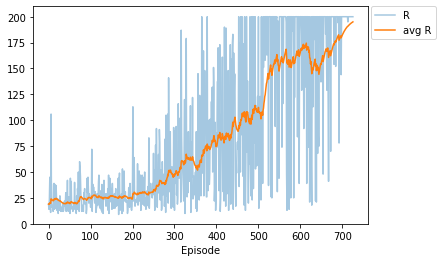

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

rewards = plt.plot(R, alpha=.4, label='R')
avg_rewards = plt.plot(R_avg,label='avg R')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Episode')
plt.ylim(0, 210)
plt.show()

Congratulations, you have now successfully implemented the DDQN algorithm. You are encouraged to explore different problems. There are a lot of different environments ready for you to implement your algorithms in. A few of these resources are:
* [OpenAI gym](https://github.com/openai/gym)
* [OpenAI Universe](https://github.com/openai/universe)
* [DeepMind Lab](https://deepmind.com/blog/open-sourcing-deepmind-lab/)

The model you implemented in this lab can be extended to solve harder problems. A good starting-point is to try to solve the Acrobot-problem, by loading the environment as 

**gym.make("Acrobot-v1")**.

The problem might require some modifications to how you decay $\epsilon$, but otherwise, the code you have written within this lab should be sufficient. 

### Task 3.2 Atari games

**(4 POE Optional)**

A common benchmark for reinforcement learning algorithms is the old Atari games. Each timestep for the Atari games, the agent observes a screenshot as its current state.

There is an issue with this definition of the agent state, what?

Name at least two solutions to the problem, and why it wouldn't work well without these changes. 

Hint:
- Imagine the game of pong. What is important for the algorithm to predict? What is the state of the agent? Is it possible to play the game optimally with this state formulation?

**Your answer:** Since we only observe a single screenshot of the game as the current state of the agent it results in a partially observable MDP and the environment changes perpetually with each time steps. Therefore, it is impossible to evaluate the current situation from only one screenshot at a given time stamp. 

One of the solutions to this would be, to try out a sequence of action and observations and store them. Since we know that every sequence has to terminate in finite number of the time steps. And based on these observations we try to learn the game. This would result in a large MDP in which we consider each sequence to be a state.

Second solution would be to feed 2 frames and detect the difference between them. This will help us detect the motion between 2 frames which give us the information to make it an observable MDP. We could for example feed "difference frames" to the network (subtraction of current and last frame).
 